# Task - 3

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load dataset
df = pd.read_csv("C:\\Users\\Shrushti\\Downloads\\WineQT.csv")

In [3]:
# Drop unnecessary column
df.drop('Id', axis=1, inplace=True)

In [4]:
# Split features and target
X = df.drop('quality', axis=1)
y = df['quality']

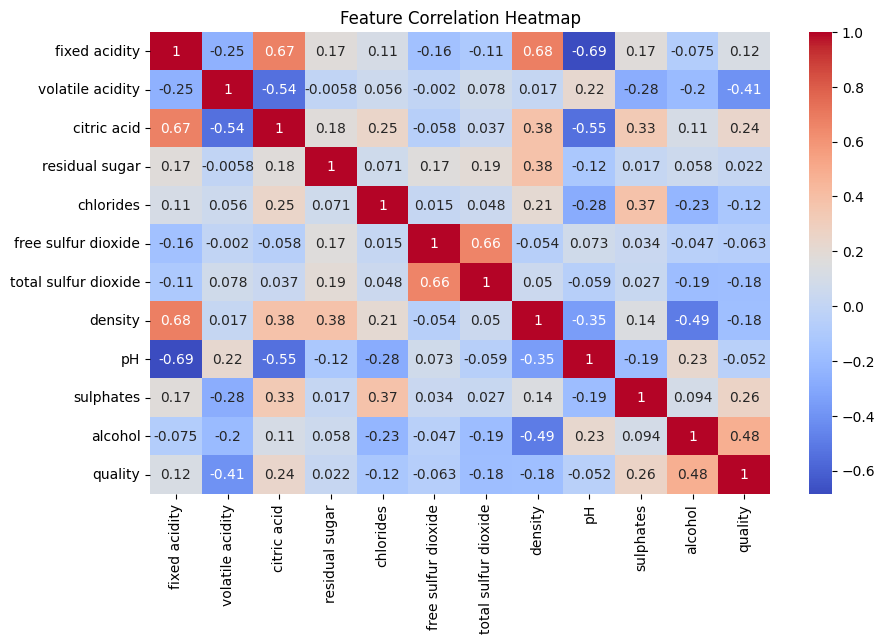

In [5]:
# Visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# ------------------ Model 1: Random Forest ------------------
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))

Random Forest Results:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.80      0.76        96
           6       0.68      0.67      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.42      0.43      0.43       229
weighted avg       0.68      0.70      0.69       229

[[ 0  3  3  0  0]
 [ 0 77 18  1  0]
 [ 0 27 66  6  0]
 [ 0  0  8 18  0]
 [ 0  0  2  0  0]]


In [9]:
# ------------------ Model 2: Stochastic Gradient Descent ------------------
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train_scaled, y_train)
sgd_preds = sgd_model.predict(X_test_scaled)
print("SGD Classifier Results:")
print(classification_report(y_test, sgd_preds))
print(confusion_matrix(y_test, sgd_preds))

SGD Classifier Results:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.57      0.80      0.67        96
           6       0.53      0.24      0.33        99
           7       0.30      0.54      0.39        26
           8       0.00      0.00      0.00         2

    accuracy                           0.50       229
   macro avg       0.24      0.26      0.23       229
weighted avg       0.51      0.50      0.47       229

[[ 0  0  0  0  0  0]
 [ 0  0  4  1  1  0]
 [ 1  0 77 13  5  0]
 [ 0  1 48 24 24  2]
 [ 0  0  5  7 14  0]
 [ 0  0  0  0  2  0]]


In [10]:
# ------------------ Model 3: Support Vector Classifier ------------------
svc_model = SVC(random_state=42)
svc_model.fit(X_train_scaled, y_train)
svc_preds = svc_model.predict(X_test_scaled)
print("SVC Results:")
print(classification_report(y_test, svc_preds))
print(confusion_matrix(y_test, svc_preds))

SVC Results:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.74      0.72        96
           6       0.59      0.69      0.64        99
           7       0.54      0.27      0.36        26
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.37      0.34      0.34       229
weighted avg       0.61      0.64      0.62       229

[[ 0  3  3  0  0]
 [ 0 71 25  0  0]
 [ 0 26 68  5  0]
 [ 0  1 18  7  0]
 [ 0  0  1  1  0]]


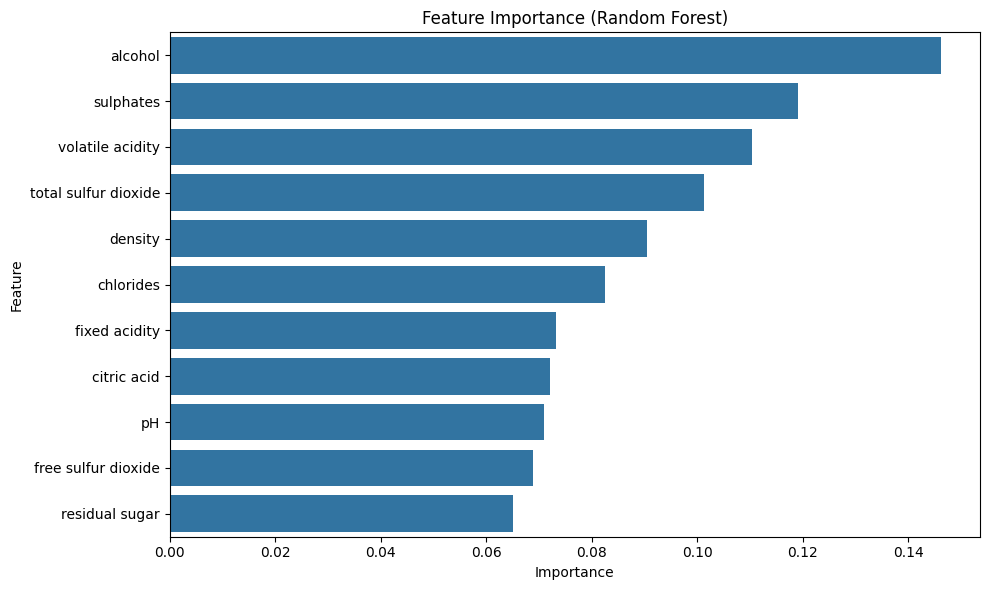

In [17]:
# Feature importances
importances = rf_model.feature_importances_
features = X.columns

# Create DataFrame
importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
importance_df = importance_df.sort_values("Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

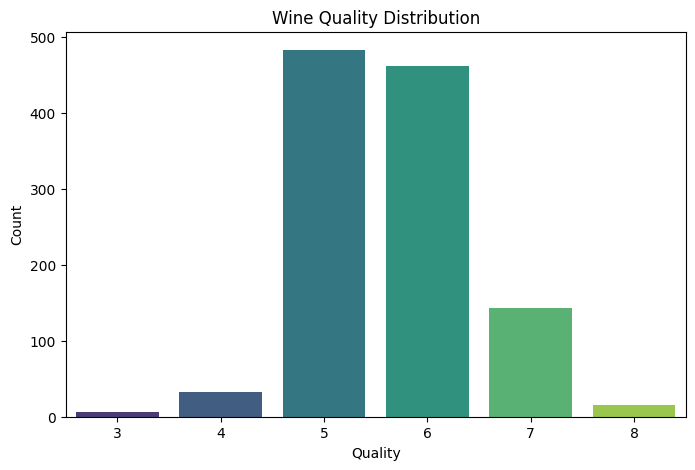

In [19]:
# Visualize the distribution of wine quality
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='quality', palette='viridis')
plt.title('Wine Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

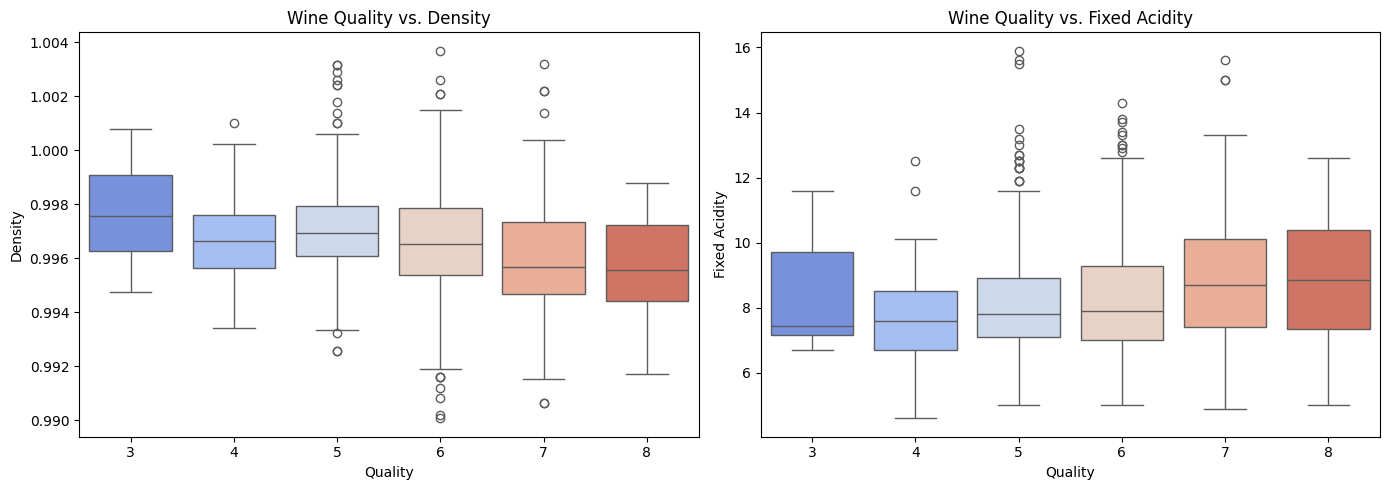

In [23]:
# Visual analysis: Density and Fixed Acidity vs Quality
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot: Density vs Quality
sns.boxplot(data=df, x='quality', y='density', ax=axs[0], palette='coolwarm')
axs[0].set_title('Wine Quality vs. Density')
axs[0].set_xlabel('Quality')
axs[0].set_ylabel('Density')

# Boxplot: Fixed Acidity vs Quality
sns.boxplot(data=df, x='quality', y='fixed acidity', ax=axs[1], palette='coolwarm')
axs[1].set_title('Wine Quality vs. Fixed Acidity')
axs[1].set_xlabel('Quality')
axs[1].set_ylabel('Fixed Acidity')

plt.tight_layout()
plt.show()